<a href="https://colab.research.google.com/github/AAgusCF/TelecomX-Data-Science/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TelecomX**

##Extracción de datos

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
telecom_data = pd.read_json(url)
telecom_data

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [9]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [10]:
telecom_data.shape

(7267, 6)

##Comprobación de incoherencias en los datos

In [11]:
columns = list(telecom_data.columns)[2:]
columns

['customer', 'phone', 'internet', 'account']

In [12]:
for c in columns:
    telecom_data_normalized = pd.json_normalize(telecom_data[c])
    telecom_data.drop(columns=[c],inplace=True)
    telecom_data = pd.concat([telecom_data,telecom_data_normalized], axis=1)

telecom_data

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [13]:
telecom_data['customerID'].unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [14]:
telecom_data['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [15]:
telecom_data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
telecom_data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
telecom_data['Dependents'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
telecom_data['PhoneService'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
telecom_data['MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [20]:
telecom_data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [21]:
telecom_data['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [22]:
telecom_data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [23]:
telecom_data['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [24]:
telecom_data['TechSupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [25]:
telecom_data['StreamingTV'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [26]:
telecom_data['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [27]:
telecom_data['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [28]:
telecom_data['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [29]:
telecom_data['PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [30]:
telecom_data.duplicated().sum()

np.int64(0)

In [31]:
telecom_data.customerID.str.len().value_counts()

,count
customerID,
10,7267


In [32]:
telecom_data.Churn.str.len().value_counts()

,count
Churn,
2,5174
3,1869
0,224


In [33]:
telecom_data.isnull()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7263,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7264,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7265,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
telecom_data.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [35]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


##Columna de cuentas diarias

In [36]:
telecom_data['Cuentas_Diarias'] = telecom_data['Charges.Monthly']/30
telecom_data['Cuentas_Diarias'].head()

,Cuentas_Diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667


##Estandarización y transformación de datos

In [37]:
telecom_data['Charges.Total'] = telecom_data['Charges.Total'].apply(lambda x: '0.0' if x==' ' else x)

In [38]:
telecom_data['Charges.Total'] = telecom_data['Charges.Total'].astype(np.float64)

In [39]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [40]:
telecom_data['Churn'] = telecom_data['Churn'].apply(lambda x: 'No' if x=='' else x)

In [41]:
telecom_data.Churn.str.len().value_counts()

,count
Churn,
2,5398
3,1869


In [42]:
telecom_data['MultipleLines'] = telecom_data['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})

In [43]:
columns_yn_to_transform = ['Churn','Partner','Dependents','PhoneService','PaperlessBilling']

In [44]:
columns_to_transform = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [45]:
telecom_data[columns_yn_to_transform] = telecom_data[columns_yn_to_transform].apply(lambda x:x.map({'Yes': 1, 'No': 0}))

In [46]:
telecom_data[columns_to_transform] = telecom_data[columns_to_transform].apply(lambda x:x.map({'Yes': 1, 'No': 0, 'No internet service': 0}))

In [47]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


In [48]:
telecom_data.head(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
5,0013-MHZWF,0,Female,0,0,1,9,1,0,DSL,...,0,1,1,1,Month-to-month,1,Credit card (automatic),69.40,571.45,2.313333
6,0013-SMEOE,0,Female,1,1,0,71,1,0,Fiber optic,...,1,1,1,1,Two year,1,Bank transfer (automatic),109.70,7904.25,3.656667
7,0014-BMAQU,0,Male,0,1,0,63,1,1,Fiber optic,...,0,1,0,0,Two year,1,Credit card (automatic),84.65,5377.80,2.821667
8,0015-UOCOJ,0,Female,1,0,0,7,1,0,DSL,...,0,0,0,0,Month-to-month,1,Electronic check,48.20,340.35,1.606667
9,0016-QLJIS,0,Female,0,1,1,65,1,1,DSL,...,1,1,1,1,Two year,1,Mailed check,90.45,5957.90,3.015000


##Análisis Descriptivo

In [49]:
telecom_data.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [50]:
telecom_data[['tenure','Charges.Monthly','Charges.Total']].describe()

,tenure,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035
std,24.571773,30.129572,2268.648587
min,0.000000,18.250000,0.000000
25%,9.000000,35.425000,396.200000
50%,29.000000,70.300000,1389.200000
75%,55.000000,89.875000,3778.525000
max,72.000000,118.750000,8684.800000


##Distribución de evasión

In [51]:
churn = telecom_data.groupby(telecom_data['Churn'])['Churn'].value_counts()

In [52]:
churn

,count
Churn,
0,5398
1,1869


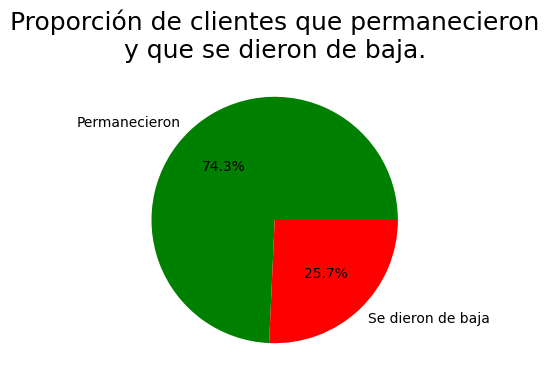

In [53]:
fig, ax = plt.subplots(figsize=(8,4))

colores = ['green', 'red']
ax.pie(data=churn,x=churn, labels=['Permanecieron', 'Se dieron de baja'], autopct='%1.1f%%', colors=colores)
ax.set_title('Proporción de clientes que permanecieron\ny que se dieron de baja.', fontsize=18)

plt.show()

##Recuento de evasión por variables categóricas

In [54]:
sns.set_theme()

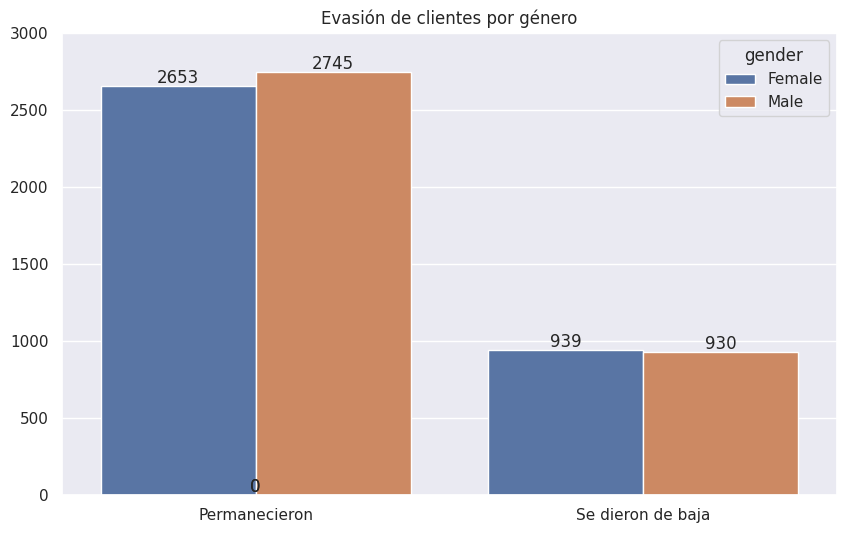

In [64]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(data=telecom_data,x='Churn', hue='gender', orient='v')
ax.set(title='Evasión de clientes por género',xlabel='',ylabel='')
ax.set_xticks([0,1])
ax.set_xticklabels(['Permanecieron', 'Se dieron de baja'])
ax.set_ylim(0,3000)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 20, str(int(height)), ha='center')


plt.show()

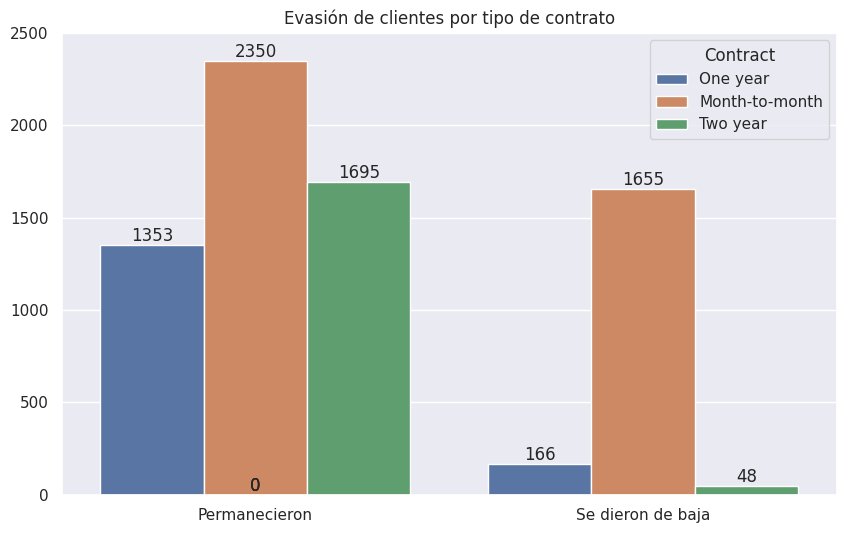

In [67]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(data=telecom_data,x='Churn', hue='Contract', orient='v')
ax.set(title='Evasión de clientes por tipo de contrato',xlabel='',ylabel='')
ax.set_xticks([0,1])
ax.set_xticklabels(['Permanecieron', 'Se dieron de baja'])
ax.set_ylim(0,2500)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 20, str(int(height)), ha='center')


plt.show()

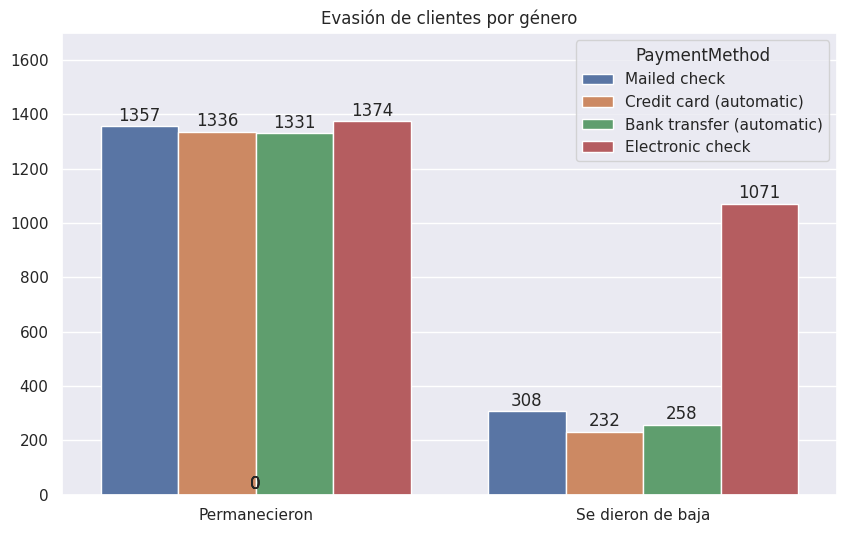

In [69]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(data=telecom_data,x='Churn', hue='PaymentMethod', orient='v')
ax.set(title='Evasión de clientes por género',xlabel='',ylabel='')
ax.set_xticks([0,1])
ax.set_xticklabels(['Permanecieron', 'Se dieron de baja'])
ax.set_ylim(0,1700)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 20, str(int(height)), ha='center')


plt.show()

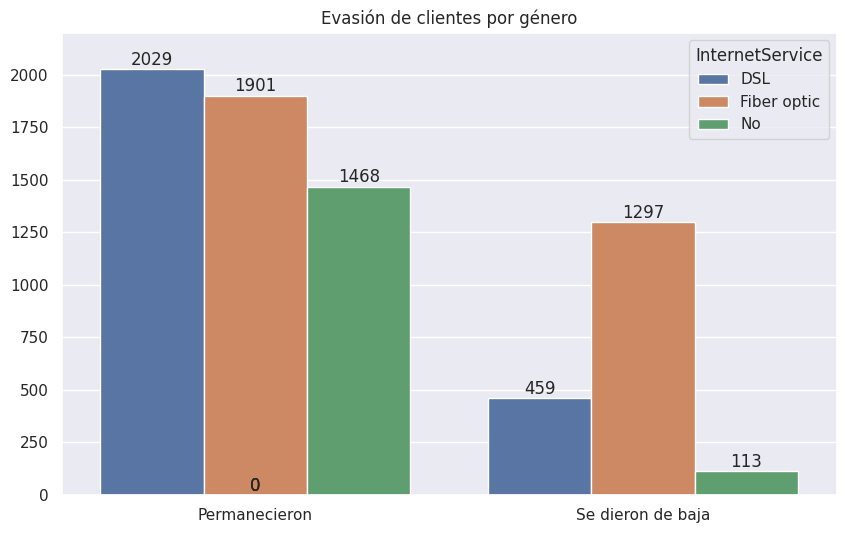

In [71]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(data=telecom_data,x='Churn', hue='InternetService', orient='v')
ax.set(title='Evasión de clientes por género',xlabel='',ylabel='')
ax.set_xticks([0,1])
ax.set_xticklabels(['Permanecieron', 'Se dieron de baja'])
ax.set_ylim(0,2200)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 20, str(int(height)), ha='center')


plt.show()

##Conteo de evasión por variables numéricas

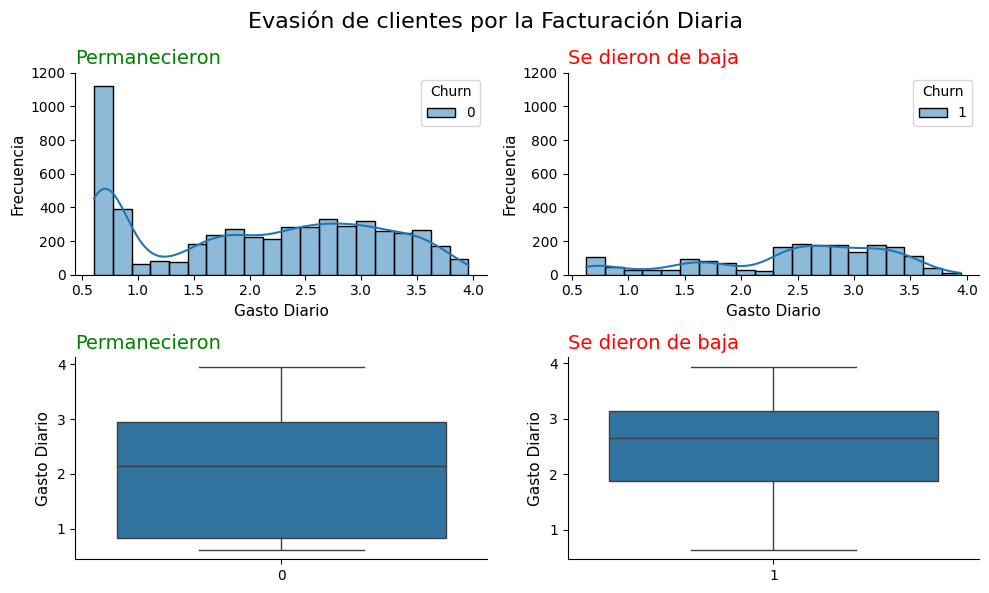

In [180]:
fig, axs = plt.subplots(2,2,figsize=(10,6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Evasión de clientes por la Facturación Diaria',fontsize=16)

axs[0][0] = sns.histplot(telecom_data[telecom_data['Churn']==0], x='Cuentas_Diarias', hue='Churn', kde=True, ax=axs[0][0], bins=20)
axs[0][0].set_title('Permanecieron',fontsize=14, loc='left', color='g')

axs[0][1] = sns.histplot(telecom_data[telecom_data['Churn']==1], x='Cuentas_Diarias', hue='Churn', kde=True, ax=axs[0][1], bins=20)
axs[0][1].set_title('Se dieron de baja',fontsize=14, loc='left', color='r')

axs[1][0] = sns.boxplot(telecom_data[telecom_data['Churn']==0], x='Churn', y='Cuentas_Diarias', ax=axs[1][0])
axs[1][0].set_title('Permanecieron',fontsize=14, loc='left', color='g')

axs[1][1] = sns.boxplot(telecom_data[telecom_data['Churn']==1], x='Churn', y='Cuentas_Diarias', ax=axs[1][1])
axs[1][1].set_title('Se dieron de baja',fontsize=14, loc='left', color='r')

ymin = 0
ymax = 1200

axs[0][0].set_ylim(ymin,ymax)
axs[0][1].set_ylim(ymin,ymax)

axs[0][0].set_xlabel('Gasto Diario',fontsize=11)
axs[0][0].set_ylabel('Frecuencia',fontsize=11)
axs[0][1].set_xlabel('Gasto Diario',fontsize=11)
axs[0][1].set_ylabel('Frecuencia',fontsize=11)
axs[1][0].set_xlabel('',fontsize=11)
axs[1][0].set_ylabel('Gasto Diario',fontsize=11)
axs[1][1].set_xlabel('',fontsize=11)
axs[1][1].set_ylabel('Gasto Diario',fontsize=11)

sns.despine()
plt.tight_layout()
plt.show()

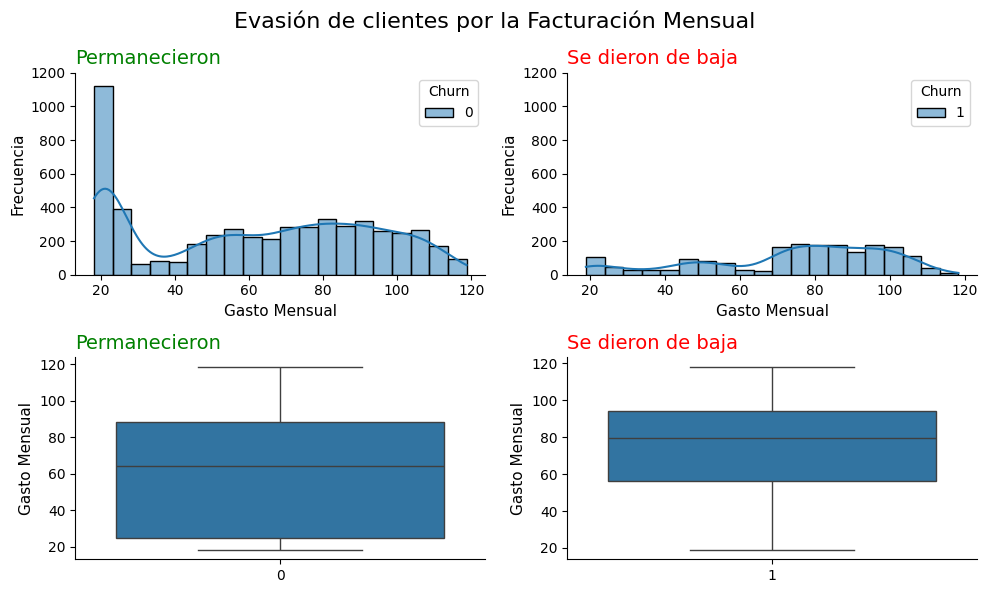

In [181]:
fig, axs = plt.subplots(2,2,figsize=(10,6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Evasión de clientes por la Facturación Mensual',fontsize=16)

axs[0][0] = sns.histplot(telecom_data[telecom_data['Churn']==0], x='Charges.Monthly', hue='Churn', kde=True, ax=axs[0][0], bins=20)
axs[0][0].set_title('Permanecieron',fontsize=14, loc='left', color='g')

axs[0][1] = sns.histplot(telecom_data[telecom_data['Churn']==1], x='Charges.Monthly', hue='Churn', kde=True, ax=axs[0][1], bins=20)
axs[0][1].set_title('Se dieron de baja',fontsize=14, loc='left', color='r')

axs[1][0] = sns.boxplot(telecom_data[telecom_data['Churn']==0], x='Churn', y='Charges.Monthly', ax=axs[1][0])
axs[1][0].set_title('Permanecieron',fontsize=14, loc='left', color='g')

axs[1][1] = sns.boxplot(telecom_data[telecom_data['Churn']==1], x='Churn', y='Charges.Monthly', ax=axs[1][1])
axs[1][1].set_title('Se dieron de baja',fontsize=14, loc='left', color='r')

ymin = 0
ymax = 1200

axs[0][0].set_ylim(ymin,ymax)
axs[0][1].set_ylim(ymin,ymax)

axs[0][0].set_xlabel('Gasto Mensual',fontsize=11)
axs[0][0].set_ylabel('Frecuencia',fontsize=11)
axs[0][1].set_xlabel('Gasto Mensual',fontsize=11)
axs[0][1].set_ylabel('Frecuencia',fontsize=11)
axs[1][0].set_xlabel('',fontsize=11)
axs[1][0].set_ylabel('Gasto Mensual',fontsize=11)
axs[1][1].set_xlabel('',fontsize=11)
axs[1][1].set_ylabel('Gasto Mensual',fontsize=11)

sns.despine()
plt.tight_layout()
plt.show()

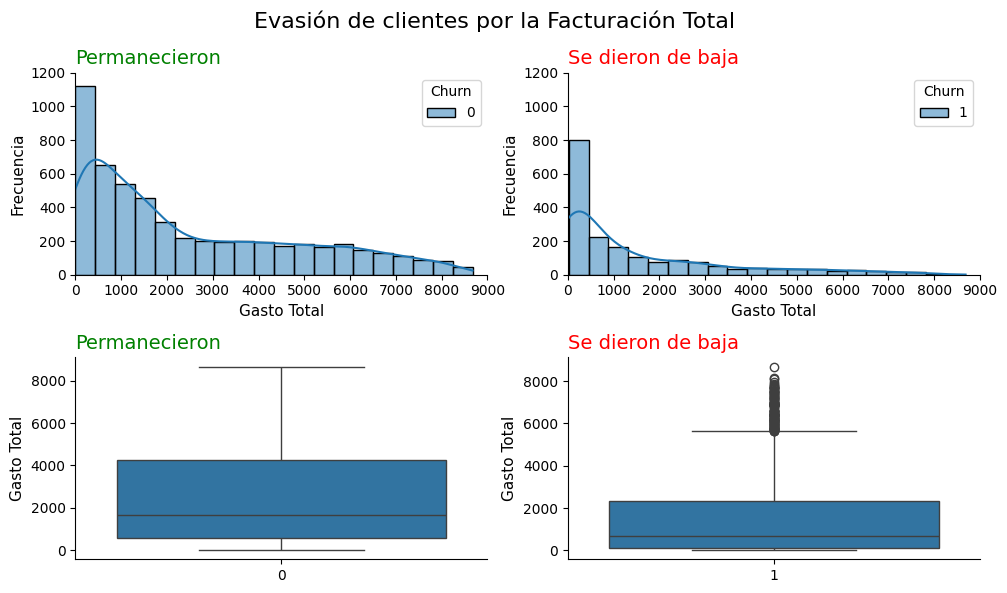

In [182]:
fig, axs = plt.subplots(2,2,figsize=(10,6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Evasión de clientes por la Facturación Total',fontsize=16)

axs[0][0] = sns.histplot(telecom_data[telecom_data['Churn']==0], x='Charges.Total', hue='Churn', kde=True, ax=axs[0][0], bins=20)
axs[0][0].set_title('Permanecieron',fontsize=14, loc='left', color='g')


axs[0][1] = sns.histplot(telecom_data[telecom_data['Churn']==1], x='Charges.Total', hue='Churn', kde=True, ax=axs[0][1], bins=20)
axs[0][1].set_title('Se dieron de baja',fontsize=14, loc='left', color='r')

axs[1][0] = sns.boxplot(telecom_data[telecom_data['Churn']==0], x='Churn', y='Charges.Total', ax=axs[1][0])
axs[1][0].set_title('Permanecieron',fontsize=14, loc='left', color='g')

axs[1][1] = sns.boxplot(telecom_data[telecom_data['Churn']==1], x='Churn', y='Charges.Total', ax=axs[1][1])
axs[1][1].set_title('Se dieron de baja',fontsize=14, loc='left', color='r')


ymin = 0
ymax = 1200
xmin = 0
xmax = 9000

axs[0][0].set_ylim(ymin,ymax)
axs[0][1].set_ylim(ymin,ymax)
axs[0][0].set_xlim(xmin,xmax)
axs[0][1].set_xlim(xmin,xmax)

axs[0][0].set_xlabel('Gasto Total',fontsize=11)
axs[0][0].set_ylabel('Frecuencia',fontsize=11)
axs[0][1].set_xlabel('Gasto Total',fontsize=11)
axs[0][1].set_ylabel('Frecuencia',fontsize=11)
axs[1][0].set_xlabel('',fontsize=11)
axs[1][0].set_ylabel('Gasto Total',fontsize=11)
axs[1][1].set_xlabel('',fontsize=11)
axs[1][1].set_ylabel('Gasto Total',fontsize=11)

sns.despine()
plt.tight_layout()
plt.show()

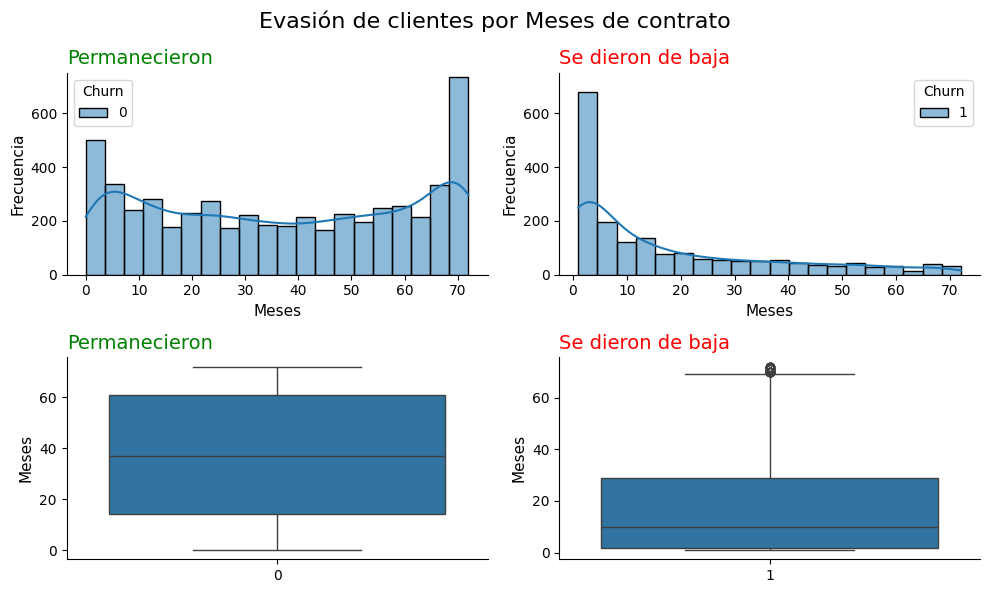

In [183]:
fig, axs = plt.subplots(2,2,figsize=(10,6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Evasión de clientes por Meses de contrato',fontsize=16)

axs[0][0] = sns.histplot(telecom_data[telecom_data['Churn']==0], x='tenure', hue='Churn', kde=True, ax=axs[0][0], bins=20)
axs[0][0].set_title('Permanecieron',fontsize=14, loc='left', color='g')

axs[0][1] = sns.histplot(telecom_data[telecom_data['Churn']==1], x='tenure', hue='Churn', kde=True, ax=axs[0][1], bins=20)
axs[0][1].set_title('Se dieron de baja',fontsize=14, loc='left', color='r')

axs[1][0] = sns.boxplot(telecom_data[telecom_data['Churn']==0], x='Churn', y='tenure', ax=axs[1][0])
axs[1][0].set_title('Permanecieron',fontsize=14, loc='left', color='g')

axs[1][1] = sns.boxplot(telecom_data[telecom_data['Churn']==1], x='Churn', y='tenure', ax=axs[1][1])
axs[1][1].set_title('Se dieron de baja',fontsize=14, loc='left', color='r')


ymin = 0
ymax = 750

axs[0][0].set_ylim(ymin,ymax)
axs[0][1].set_ylim(ymin,ymax)

axs[0][0].set_xlabel('Meses',fontsize=11)
axs[0][0].set_ylabel('Frecuencia',fontsize=11)
axs[0][1].set_xlabel('Meses',fontsize=11)
axs[0][1].set_ylabel('Frecuencia',fontsize=11)
axs[1][0].set_xlabel('',fontsize=11)
axs[1][0].set_ylabel('Meses',fontsize=11)
axs[1][1].set_xlabel('',fontsize=11)
axs[1][1].set_ylabel('Meses',fontsize=11)

sns.despine()
plt.tight_layout()
plt.show()

##Informe final